In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We see that the data in the long column is with the negative sign :

In [4]:
data.long=data.long.apply(np.abs)

In [5]:
data.shape


(21613, 21)

In [6]:
len(data)

21613

In [7]:
for col in data:
    print(col)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


We see that date and id is not required to train the model :

In [8]:
X=data.drop(["id","date","zipcode","price"],axis="columns")

In [9]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,122.045,1800,7503


In [10]:
y=data["price"]

In [11]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [12]:
data[data.price>1000000]["bedrooms"]

5        4
21       3
49       3
69       5
70       5
91       5
103      3
125      4
153      4
185      5
216      5
218      2
235      5
246      4
269      4
270      4
282      5
300      4
312      5
313      4
314      4
384      5
394      4
419      5
427      3
446      3
450      3
460      4
472      4
473      4
        ..
21375    6
21383    4
21425    4
21426    4
21460    4
21467    5
21469    4
21473    4
21477    4
21485    5
21486    4
21501    5
21505    3
21506    5
21514    4
21520    4
21521    5
21525    4
21530    4
21532    4
21540    5
21548    2
21551    5
21568    4
21576    5
21590    4
21593    5
21597    4
21600    5
21606    4
Name: bedrooms, Length: 1465, dtype: int64

In [13]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503


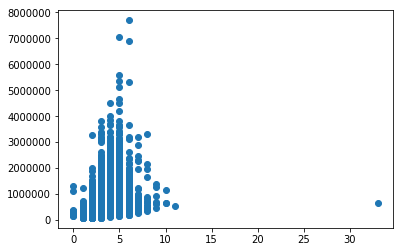

In [14]:
plt.scatter(data.bedrooms,data.price)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


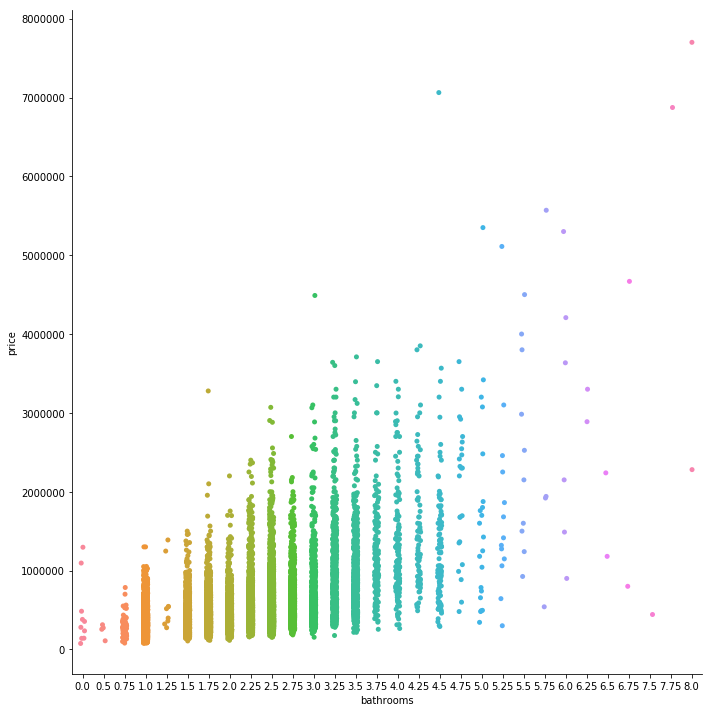

In [15]:
sns.catplot(x="bathrooms",y="price",data=data,size=10)


In [16]:
#sns.barplot(x="price",y="yr_built",data=data)

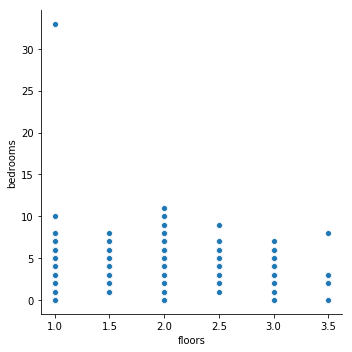

In [36]:
sns.relplot(x="floors",y="bedrooms",data=data)

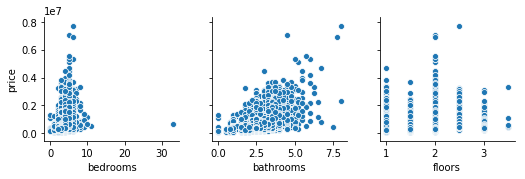

In [37]:
sns.pairplot(x_vars=["bedrooms","bathrooms","floors"],y_vars="price",data=data)

Training and testing data using Train_Test_Split #1:

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.90,random_state=2)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
X_train.shape

(19451, 17)

In [19]:
y_train.shape

(19451,)

In [20]:
X_test.shape

(2162, 17)

In [21]:
y_test.shape

(2162,)

In [22]:
lireg=LinearRegression()

In [23]:
lireg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
y_pred=lireg.predict(X_test)

In [25]:
y_pred.shape

(2162,)

In [26]:
mse=metrics.mean_squared_error(y_test,y_pred)

In [27]:
mse

39752330374.04407

In [28]:
lireg.score(X_test,y_test)

0.727957352022311

In [29]:
lireg.score(X_train,y_train)

0.6913352968347188

In [30]:
lireg.intercept_

-37127547.79446307

In [31]:
lireg.coef_

array([-3.52331046e+04,  4.09899099e+04,  1.10629824e+02,  1.04641937e-01,
        2.92652849e+02,  6.08125817e+05,  4.79865461e+04,  3.07379814e+04,
        9.52699308e+04,  7.02698349e+01,  4.03599898e+01, -2.40212225e+03,
        2.12724373e+01,  5.66401902e+05,  1.16389348e+05,  2.76271334e+01,
       -3.63306694e-01])

In [32]:
lireg.predict(np.array([2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,122.233,2720,8062]).reshape(1,-1))

array([341812.32214426])

In [34]:
#scores=cross_val_score(lireg,X,y,scoring="accuracy")

Gradient Boosting Regressor #2

In [38]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [40]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
clf.score(X_test,y_test)

0.9203462552504101

In [44]:
clf.predict(np.array([2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,122.233,2720,8062]).reshape(1,-1))

array([214168.5235728])

Random Forest Regressor #3

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
regr=RandomForestRegressor(random_state=0)

In [79]:
regr.fit(X_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [80]:
y_pred=regr.predict(X_test)

In [81]:
y_pred

array([ 680550., 1645000.,  505587., ...,  266000.,  290570.,  518005.])

In [82]:
regr.predict(np.array([2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,122.233,2720,8062]).reshape(1,-1))

array([214995.])

In [83]:
regr.predict(np.array([3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,122.257,1340,5650]).reshape(1,-1))

array([234925.])

In [85]:
y_test.shape

(2162,)

In [86]:
y_pred.shape

(2162,)

In [91]:
print("From the above predictions we estimate that Random Forest is making better predictions")

From the above predictions we estimate that Random Forest is making better predictions
